In [1]:
from matplotlib import pylab
from astropy.coordinates import SkyCoord
import integralclient as ic

import time
import numpy as np

from astropy.table import Table, vstack
from astropy.io import fits
import glob


failed to get AUTH with env due to: 'K8S_SECRET_INTEGRAL_CLIENT_SECRET'
got AUTH with homefile for integral-limited


In [2]:
RA=40.669879
Dec=-0.013289
tstart_rel_mdays=10
tstop_rel_days=10
t0_utc="2023-05-18T12:59:08.000000"
cons=1
nrt=1
test=0

In [3]:
if test:
    from nb2workflow import nbadapter
    
    import datetime
    
    import sys
    sys.stderr = sys.stdout
    
    def test_realtime():
        nba =nbadapter.NotebookAdapter("iobserve.ipynb")
        
        utc_now=datetime.datetime.utcnow()
        utc_realtime = (utc_now-datetime.timedelta(seconds=1000)).strftime("%Y-%m-%dT%T")

        nba.execute(dict(
            RA=40.669879,
            Dec=-0.013289,
            tstart_rel_mdays=0.1,
            tstop_rel_days=0.1,
            t0_utc=utc_realtime,
            cons=1,
            nrt=1,
            test=0,
        ),
                    log_output=False,
                    progress_bar=False)
        output = nba.extract_output()

        output['history_png_content']=""
        output['hist_png_content']=""

        print(output)

        assert output['data_readiness'] == 'realtime'

    
    
    def test_cons():
        nba =nbadapter.NotebookAdapter("iobserve.ipynb")

        nba.execute(dict(
            RA=40.669879,
            Dec=-0.013289,
            tstart_rel_mdays=10,
            tstop_rel_days=10,
            t0_utc="2017-12-01T02:38:00",
            cons=1,
            nrt=1,
            test=0,
        ),
                    log_output=False,
                    progress_bar=False)
        output = nba.extract_output()

        output['history_png_content']=""
        output['hist_png_content']=""

        print(output)

        assert output['data_readiness'] == 'CONS'

    def test_nrt():
        nba =nbadapter.NotebookAdapter("iobserve.ipynb")
        
        utc_now=datetime.datetime.utcnow()
        utc_realtime = (utc_now-datetime.timedelta(hours=10)).strftime("%Y-%m-%dT%T")

        nba.execute(dict(
            RA=40.669879,
            Dec=-0.013289,
            tstart_rel_mdays=10,
            tstop_rel_days=10,
            t0_utc=utc_realtime,
            cons=1,
            nrt=1,
            test=0,
        ),
                    log_output=False,
                    progress_bar=False)
        output = nba.extract_output()

        output['history_png_content']=""
        output['hist_png_content']=""

        print(output)

        assert output['data_readiness'] == 'NRT'

        
    test_cons()
    test_nrt()
    test_realtime()
    
    raise Exception('test complete successfully')
    

In [4]:
source_coord = SkyCoord(RA, Dec, unit = "deg")

In [5]:
import os

arc_root_prefix = None
arc_root_prefixes = ["/mnt/sshfs/isdc/","/"]

for _ in arc_root_prefixes:
    if os.path.exists(_ + "/isdc/arc/rev_3/idx/scw/GNRL-SCWG-GRP-IDX.fits"):
        print("picking this arc root prefix:",arc_root_prefix)
        arc_root_prefix = _
        break
    
if arc_root_prefix is None:
    raise Exception("no archive found!")

print("found prefix", arc_root_prefix)

picking this arc root prefix: None
found prefix /mnt/sshfs/isdc/


In [6]:

tables=[]

if cons == 1:
    complete_scwd_cons = Table.read(fits.open(arc_root_prefix+"/isdc/arc/rev_3/idx/scw/GNRL-SCWG-GRP-IDX.fits"))
    tables.append(complete_scwd_cons)

if nrt == 1:
    print("nrt:",arc_root_prefix+"/isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_*")
    print("nrt:",glob.glob(arc_root_prefix+"/isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_*"))
    complete_scwd_nrt = Table.read(fits.open(sorted(glob.glob(arc_root_prefix+"/isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_*"))[-1])[1])
    tables.append(complete_scwd_nrt)
    
print(len(tables))
    
complete_scwd = vstack(tables)

nrt: /mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_*
nrt: ['/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_20230518103258.fits', '/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_20230517065617.fits', '/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_20230518103646.fits', '/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_20230517151646.fits', '/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_20230518113420.fits', '/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_20230517151724.fits', '/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_20230518114230.fits', '/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_20230517163710.fits', '/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_20230518123903.fits', '/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-SCWG-GRP-IDX_20230517174343.fits', '/mnt/sshfs/isdc//isdc/pvphase/nrt/ops/idx/scw/GNRL-S

2023-05-19 17:37:24 savchenk-NG-VN7-793G-79EG astropy[1779586] WARNING MergeConflictWarning: Cannot merge meta key 'CREATOR' types <class 'str'> and <class 'str'>, choosing CREATOR='idx_add 3.3.1'
2023-05-19 17:37:24 savchenk-NG-VN7-793G-79EG astropy[1779586] WARNING MergeConflictWarning: Cannot merge meta key 'CONFIGUR' types <class 'str'> and <class 'str'>, choosing CONFIGUR='isdc-core-sw-0.3_2011-08-08T09:21:05'
2023-05-19 17:37:24 savchenk-NG-VN7-793G-79EG astropy[1779586] WARNING MergeConflictWarning: Cannot merge meta key 'DATE' types <class 'str'> and <class 'str'>, choosing DATE='2014-05-19T11:53:47'
2023-05-19 17:37:24 savchenk-NG-VN7-793G-79EG astropy[1779586] WARNING MergeConflictWarning: Cannot merge meta key 'STAMP' types <class 'str'> and <class 'str'>, choosing STAMP='2014-05-19T11:53:47 idx_add 3.3.1'
2023-05-19 17:37:24 savchenk-NG-VN7-793G-79EG astropy[1779586] WARNING MergeConflictWarning: Cannot merge meta key 'CHECKSUM' types <class 'str'> and <class 'str'>, choosi

In [7]:
now_ijd = float(ic.converttime("UTC",time.strftime("%Y-%m-%dT%H:%M:%S"),"IJD"))
t0_ijd =  float(ic.converttime("UTC",t0_utc,"IJD"))

tstart_ijd = t0_ijd - tstart_rel_mdays
tstop_ijd = t0_ijd + tstop_rel_days

now_ijd, t0_ijd, tstart_ijd, tstop_ijd

2023-05-19 17:37:24 savchenk-NG-VN7-793G-79EG root[1779586] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/UTC/2023-05-19T17:37:24/IJD
2023-05-19 17:37:25 savchenk-NG-VN7-793G-79EG root[1779586] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/UTC/2023-05-18T12:59:08.000000/IJD


(8539.735106296297, 8538.541865555555, 8528.541865555555, 8548.541865555555)

In [8]:
print(complete_scwd['TSTART'].min(), complete_scwd['TSTOP'].max(),tstart_ijd)

scwd=complete_scwd[(complete_scwd['TSTART'] > tstart_ijd) & (complete_scwd['TSTART'] < tstop_ijd)]

scwd_nrt=complete_scwd_nrt[(complete_scwd_nrt['TSTART'] > tstart_ijd) & (complete_scwd_nrt['TSTART'] < tstop_ijd)]
scwd_cons=complete_scwd_cons[(complete_scwd_cons['TSTART'] > tstart_ijd) & (complete_scwd_cons['TSTART'] < tstop_ijd)]

sum(scwd_nrt['TELAPSE']),sum(scwd_cons['TELAPSE'])

1020.25116834875 8539.60176339745 8528.541865555555


(955323.6157583131, 0)

In [9]:
scwd_cons

MEMBER_XTENSION,MEMBER_NAME,MEMBER_VERSION,MEMBER_POSITION,MEMBER_LOCATION,MEMBER_URI_TYPE,ISDCLEVL,DATE,ERTFIRST,ERTLAST,REVOL,SWID,SW_TYPE,SWBOUND,BCPPID,OBTSTART,OBTEND,PCKSTART,PCKEND,EXPID,EXPIDEND,PODV,PODV_END,TSTART,TSTOP,TELAPSE,RA_SCX,DEC_SCX,RA_SCZ,DEC_SCZ,L2_SCX,B2_SCX,L2_SCZ,B2_SCZ,POSANGLE,SPIMODE,IBISMODE,JMX1MODE,JMX2MODE,OMCMODE,OBSTYPE
,,,,,,,,,,,,,,,,,,,,,,,d,d,s,deg,deg,deg,deg,deg,deg,deg,deg,deg,,,,,,
str8,str32,int32,int32,str256,str3,str5,str19,str30,str30,uint16,str12,str12,str11,str8,str20,str20,uint16,uint16,str8,str8,str4,str4,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,uint8,uint8,uint8,str32


In [10]:
m_point = np.array(list(map(str.strip,scwd['SW_TYPE']))) == "POINTING"
scwd=scwd[m_point]

scx=SkyCoord(scwd['RA_SCX'],scwd['DEC_SCX'],unit="deg")

offaxis=  scx.separation(source_coord) 

In [11]:
m = offaxis.deg < 15

in_15deg_fov_ks = sum(scwd['TELAPSE'][m])
in_15deg_fov_ks

0

0 0


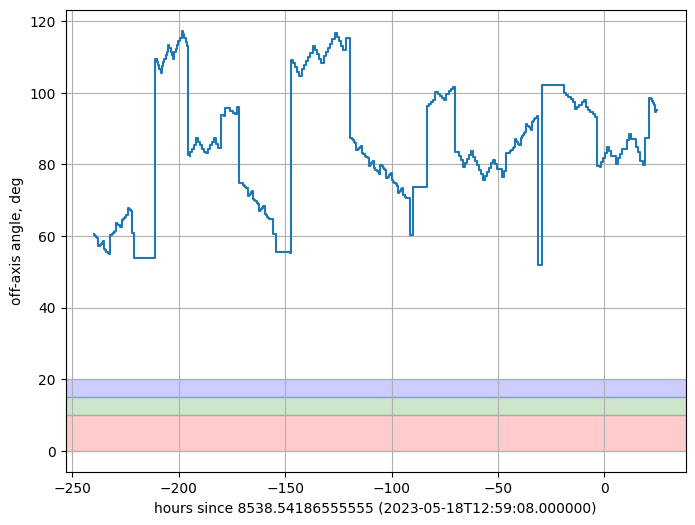

In [12]:
pylab.figure(figsize=(8,6))
pylab.step(
    (scwd['TSTART']-t0_ijd)*24,
    offaxis.deg,
    #width=scwd['TELAPSE']/24./3600*24,
    
)
#tight_layout()
pylab.grid()
#pylab.xlim(-5*24,3*24)
pylab.axhspan(0,10,alpha=0.2,color="red")
pylab.axhspan(10,15,alpha=0.2,color="green")
pylab.axhspan(15,20,alpha=0.2,color="blue")
pylab.ylabel("off-axis angle, deg")
#ylim([0,50])
pylab.xlabel("hours since %.15lg (%s)"%(t0_ijd, t0_utc))

mon=(scx.separation(source_coord).degree<10) #& (scwd['TSTART']>frb_t0_ijd-5.)


print(sum(mon),sum(scwd['TELAPSE'][mon]))

pylab.savefig("ohistory.png")

0 0


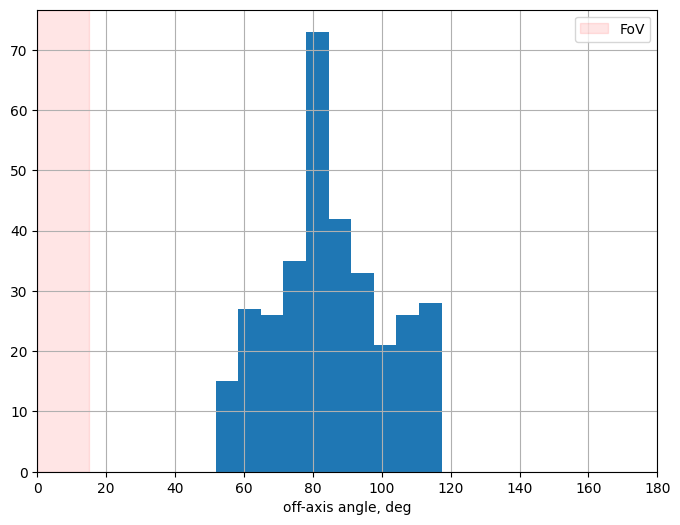

In [13]:
pylab.figure(figsize=(8,6))
pylab.hist(offaxis.deg)
pylab.grid()
pylab.xlabel("off-axis angle, deg")
#ylim([0,50])

mon=(scx.separation(source_coord).degree<10) #& (scwd['TSTART']>frb_t0_ijd-5.)

pylab.axvspan(0, 15, alpha=0.1, color='red', label="FoV")

pylab.xlim([0,180])

pylab.legend()

print(sum(mon),sum(scwd['TELAPSE'][mon]))

pylab.savefig("ohist.png")

In [2]:
from engine import engine as eng
import importlib

importlib.reload(eng)

status_data = eng.run_workflow("status.ipynb", {})['data']

print(status_data)
status_data['rtfirst_ijd'], status_data['rtlast_ijd']

found as [URIipynbFunction][(*, cons=1, nrt=1, when_utc='now')]:[file:///home/savchenk/integral_lvk/workflows/status.ipynb]
found parameters applied as [URIPythonFunction][()][prov: [('partial', ('args', ()), ('kwargs', {}), ([URIipynbFunction][(*, cons=1, nrt=1, when_utc='now')]:[file:///home/savchenk/integral_lvk/workflows/status.ipynb], None))]]:[file:///tmp/urivalue//5bd5c664//home/savchenk/integral_lvk/workflows/status]
{'curent_rev': 2641.0, 'earth_separation_kkm': 117748.5, 'earth_size_deg': 3.1000939398620573, 'last_cons_scw_dec': -36.998722076416016, 'last_cons_scw_id': '263500760010', 'last_cons_scw_ra': 323.0, 'last_cons_scw_type': 'POINTING    ', 'last_nrt_scw_dec': -47.68299865722656, 'last_nrt_scw_id': '264100500021', 'last_nrt_scw_ra': 139.03604125976562, 'last_nrt_scw_type': 'SLEW        ', 'most_recent_age_cons': 15.50174440563751, 'most_recent_age_nrt': 0.04726650995689852, 'now': '2023-05-19T17:34:43.960540+02:00', 'nrtstatus': 'ONLINE', 'prophecy': 'next break in da

(8537.646647244213, 8539.649613680556)

In [15]:
telapse_nrt=sum(scwd_nrt['TELAPSE'])
telapse_cons=sum(scwd_cons['TELAPSE'])

if len(scwd_nrt)>0:
    data_readiness_fraction_nrt = (scwd_nrt['TSTOP'].max() - scwd_nrt['TSTART'].min())/(tstop_ijd - tstart_ijd)
else:
    data_readiness_fraction_nrt = 0

nearest_nrt = complete_scwd_nrt['TSTART'][np.argmin(abs(complete_scwd_nrt['TSTART']-tstart_ijd))]
last_nrt = complete_scwd_nrt['TSTART'].max()
    
nearest_cons = complete_scwd_cons['TSTART'][np.argmin(abs(complete_scwd_cons['TSTART']-tstart_ijd))]
last_cons = complete_scwd_cons['TSTART'].max()

if len(scwd_cons)>0:
    data_readiness_fraction_cons = (scwd_cons['TSTOP'].max() - scwd_cons['TSTART'].min())/(tstop_ijd - tstart_ijd)
else:
    data_readiness_fraction_cons = 0


data_readiness = "NO DATA"
data_readiness_fraction = 0

if telapse_nrt+telapse_cons == 0 or last_nrt<t0_ijd:
    if t0_ijd<now_ijd and t0_ijd > status_data['rtfirst_ijd'] and t0_ijd < status_data['rtlast_ijd']:
        data_readiness = "realtime"
        data_readiness_fraction = min(tstop_ijd,status_data['rtlast_ijd']) - max(tstart_ijd,status_data['rtfirst_ijd'])

if telapse_nrt>0 and last_nrt>t0_ijd:
    data_readiness = "NRT"
    data_coverage_fraction = sum(scwd_nrt['TELAPSE'])/(tstop_ijd - tstart_ijd)/3600./24.
    data_readiness_fraction = data_readiness_fraction_nrt
    status_data
if telapse_cons>0 and last_cons>t0_ijd:
    data_readiness = "CONS"
    data_readiness_fraction = data_readiness_fraction_cons
    
    
data_readiness, data_readiness_fraction

('NRT', 0.552849314521518)

In [16]:
import importlib as imp
imp.reload(ic)
from integralclient.service_exception import ServiceException

sc_frame_data = ic.get_sc(utc=t0_utc,ra=RA,dec=Dec)

try:
    scw=ic.converttime("UTC",t0_utc,"SCWID")
except ServiceException as e:
    if 'is close' in repr(e):
        scw="none"
    else:
        raise
    
scw

failed to get AUTH with env due to: 'K8S_SECRET_INTEGRAL_CLIENT_SECRET'
got AUTH with homefile for integral-limited


2023-05-19 17:37:30 savchenk-NG-VN7-793G-79EG root[1779586] INFO selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/
2023-05-19 17:37:30 savchenk-NG-VN7-793G-79EG root[1779586] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/UTC/2023-05-18T12:59:08.000000/SCWID


'264100200010'

In [3]:
sc_frame_data

NameError: name 'sc_frame_data' is not defined

In [18]:
template="""
<html>
<head>
</head>
<body>

<table style="border-collapse: separate;border-spacing: 2px;" width="100%">

<tr style="background-color:#ADD8E6">
<td colspan=5 height="5px"></td>
</tr>

<tr>
<td  style="text-align:center" rowspan=2>
Event
</td>
<td  style="text-align:center">
RA, Dec
</td>
<td  style="text-align:center">
{{ event.ra | round(2) }}, {{ event.dec | round(2) }}
</td>
</tr>


<tr>
<td  style="text-align:center">
UTC
</td>
<td  style="text-align:center">
{{ event.t0_utc[:20] }}
</td>
</tr>

<tr style="background-color:#ADD8E6">
<td colspan=5 height="5px"></td>
</tr>

<tr>
<td style="text-align:center" rowspan=2>INTEGRAL Data</td>
<td style="text-align:center" >SCW</td>
<td style="text-align:center">{{ scw }}</td>
</tr>

<tr>
<td style="text-align:center">Data</td>
<td style="text-align:center">{{ data_readiness }} ({{ (100*data_readiness_fraction) | round(0) }}%)</td>
</tr>

<tr style="background-color:#ADD8E6">
<td colspan=5 height="5px"></td>
</tr>

<tr>
<td style="text-align:center" rowspan=2>SpaceCraft</td>
<td style="text-align:center">in SC (&theta;, &phi;) </td>
<td style="text-align:center">{{ sc.theta | round(1) }}, {{ sc.phi | round(1) }}</td>
</tr>

<tr>
<td style="text-align:center">to Earth </td>
<td style="text-align:center">{{ (0.001*sc.bodies.earth.separation) | round }} Mm </td>
</tr>

<tr style="background-color:#ADD8E6">
<td colspan=5 height="5px"></td>
</tr>

<tr>
<td style="text-align:left" colspan=1>
<a href="https://oda-workflows-integral-observation-summary.odahub.io/api/v1.0/get-html/status/history_html">
INTEGRAL status
</a>
</td>
<td colspan=4>
<a align="right" style="text-align:right" href="http://integral.esac.esa.int/isocweb/schedule.html?action=schedule">
Schedule
</a>
</td>
</tr>


</table>

</body>
</html>
"""

from IPython.core.display import display, HTML
from jinja2 import Environment, BaseLoader

rtemplate = Environment(loader=BaseLoader).from_string(template)

data=dict(
    event=dict(t0_utc=t0_utc, ra=RA, dec=Dec),
    data_readiness=data_readiness,
    data_readiness_fraction=data_readiness_fraction,    
    sc=sc_frame_data,
    scw=scw,
)
data_html = rtemplate.render(**data)

open("summary_card.html","w").write(data_html)

display(HTML(data_html))

/tmp/ipykernel_1779586/3755471595.py:89: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [19]:
sc_theta=sc_frame_data['theta']
sc_phi=sc_frame_data['phi']

orientation_comment = "on-ACS"

if sc_theta<15:
    orientation_comment = "FoV"    
elif sc_theta<30:
    orientation_comment = "near-FoV"    
elif sc_theta> 100:
    orientation_comment = "bottom"    
elif abs(sc_phi) < 30:
    orientation_comment = "Sun side"
else:
    orientation_comment = "on-ACS"

orientation_comment

'Sun side'

In [20]:
history_png="ohistory.png" # smth
hist_png="ohist.png" # smth else
summary_card="summary_card.html" # smth else
in_15deg_fov_ks=in_15deg_fov_ks
telapse_nrt=telapse_nrt
telapse_cons=telapse_cons
data_readiness=data_readiness
data_readiness_fraction=data_readiness_fraction
t0_utc=t0_utc
t0_ijd=t0_ijd
nearest_cons=nearest_cons
last_cons=last_cons
sc_theta=sc_theta
sc_phi=sc_phi
orientation_comment=orientation_comment